In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\serum_processed.csv')
plasma = plasma.drop(['Unnamed: 0'], axis=1)
serum = serum.drop(['Unnamed: 0'], axis=1)
plasma

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9483,103,101,963,389,123,20744,139,36,955,...,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,27468,207,155,335,227,178,8611,78,91,103,...,17898,37179,157,180080,8386,118,103083,324,929,disease
2,13976,86,78,176,152,83,22792,92,97,1010,...,29503,30670,211,138861,15822,119,92045,253,610,disease
3,19449,178,104,467,270,157,29418,123,92,289,...,16501,27573,71,183633,14024,102,97349,223,746,disease
4,17209,258,103,979,314,211,16713,76,42,1126,...,24023,30096,222,255081,23154,58,159671,189,2022,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25149,184,154,444,142,244,20728,51,128,186,...,30518,36411,114,226793,17880,57,114920,252,856,control
78,24181,142,135,786,226,146,10688,64,59,80,...,23731,26506,110,365044,29018,61,127248,359,1003,control
79,23848,118,65,132,352,294,10077,42,56,867,...,30277,35764,158,327943,19736,76,78152,453,1279,control
80,13848,97,65,881,444,122,14869,75,203,1104,...,14930,18921,2176,323303,17479,108,96830,1450,1045,control


In [3]:
plasma.dtypes

1_5-anhydroglucitol                 int64
1-monostearin                       int64
2_3-dihydroxybutanoic acid NIST     int64
2_4-diaminobutyric acid             int64
2-deoxyerythritol                   int64
                                    ...  
uridine                             int64
valine                              int64
xylitol                             int64
xylose                              int64
Class                              object
Length: 159, dtype: object

In [4]:
from scipy import stats

pearson_p = []
for i in plasma.columns:
    if plasma[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(plasma[i], plasma['Class'].map({"control": 0, "disease": 1}))
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Features', 'Pearson Coefficient', 'p-Value'])
pearson_p_df

,Features,Pearson Coefficient,p-Value
0,1_5-anhydroglucitol,-0.051611,0.645167
1,1-monostearin,0.176846,0.111975
2,2_3-dihydroxybutanoic acid NIST,0.076688,0.493476
3,2_4-diaminobutyric acid,0.076201,0.496233
4,2-deoxyerythritol,0.060320,0.590351
...,...,...,...
153,uric acid,-0.310864,0.004475
154,uridine,-0.001496,0.989356
155,valine,-0.094143,0.400187
156,xylitol,-0.068039,0.543606


In [5]:
pearson_p_final = []
for i in range(158):
    if pearson_p_df.loc[i, 'p-Value'] < 0.01:
        pearson_p_final.append(pearson_p_df.loc[i, 'Features'])
len(pearson_p_final)

22

# Serum

In [6]:
pearson_p_serum = []
for i in serum.columns:
    if serum[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(serum[i], serum['Class'].map({"control": 0, "disease": 1}))
        pearson_p_serum.append([i, pearson_coef, p_value])
pearson_p_df_serum = pd.DataFrame(pearson_p_serum, columns=['Features', 'Pearson Coefficient', 'p-Value'])
pearson_p_df_serum

,Features,Pearson Coefficient,p-Value
0,1_5-anhydroglucitol,-0.074873,0.503792
1,1-monostearin,-0.047979,0.668620
2,2_3-dihydroxybutanoic acid NIST,-0.178369,0.108871
3,2_4-diaminobutyric acid,-0.141305,0.205407
4,2-deoxyerythritol,0.017060,0.879089
...,...,...,...
153,uric acid,-0.278142,0.011401
154,uridine,0.072417,0.517926
155,valine,-0.096290,0.389481
156,xylitol,-0.131320,0.239595


In [7]:
pearson_p_final_serum = []
for i in range(158):
    if pearson_p_df_serum.loc[i, 'p-Value'] < 0.01:
        pearson_p_final_serum.append(pearson_p_df_serum.loc[i, 'Features'])
len(pearson_p_final_serum)

10

### So important variables we derived:

'3-phosphoglycerate',
 '5-methoxytryptamine',
 'adenosine-5-monophosphate',
 'asparagine',
 'aspartic acid',
 'lactic acid',
 'phenol',
 'pyrophosphate',
 'pyruvic acid',
 'taurine'

In [8]:
# necessary functions
from sklearn.decomposition import PCA
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

# Lzypredict

In [9]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
imp0 = pearson_p_final
imp1 = pearson_p_final_serum

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [12]:
accuracy = []
for k in [0, 2, 3, 4, 5, 22, 23]:
    
    if k==0:
        name = ['Plasma(Exploratory)', 'Serum(Exploratory)']
        dfs = [plasma[imp0], serum[imp1]]
    
    elif k==22 or k==23:
        k -= 20
        name = [f'tsne{k}_plasma(Exploratory)', f'tsne{k}_serum(Exploratory)']
        vars()[f'tsne{k}_plasma'] = tsne_analysis(plasma[imp0], k)
        vars()[f'tsne{k}_plasma_df'] = make_dataframe(vars()[f'tsne{k}_plasma'], k)
        
        vars()[f'tsne{k}_serum'] = pca_analysis(serum[imp1], k)
        vars()[f'tsne{k}_serum_df'] = make_dataframe(vars()[f'tsne{k}_serum'], k)
        
        dfs = [vars()[f'tsne{k}_plasma_df'], vars()[f'tsne{k}_serum_df']]
    
    else:
        name = [f'pca{k}_plasma(Exploratory)', f'pca{k}_serum(Exploratory)']
        vars()[f'pca{k}_plasma'] = pca_analysis(plasma[imp0], k)
        vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)
        
        vars()[f'pca{k}_serum'] = pca_analysis(serum[imp1], k)
        vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)
        
        dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(10):
            acc.append(result[i].iloc[0]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  7%|▋         | 2/29 [00:00<00:01, 17.86it/s]


Plasma(Exploratory): 0.878559634809635


  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


Serum(Exploratory): 0.8702748640248641


  7%|▋         | 2/29 [00:00<00:01, 16.95it/s]


pca2_plasma(Exploratory): 0.8382721445221444


  7%|▋         | 2/29 [00:00<00:01, 16.81it/s]


pca2_serum(Exploratory): 0.8320270007770008


  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


pca3_plasma(Exploratory): 0.796362665112665


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]


pca3_serum(Exploratory): 0.8505244755244756


  7%|▋         | 2/29 [00:00<00:01, 17.69it/s]


pca4_plasma(Exploratory): 0.8274135586635586


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]


pca4_serum(Exploratory): 0.887956487956488


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]


pca5_plasma(Exploratory): 0.8250728438228437


100%|██████████| 29/29 [00:00<00:00, 45.38it/s]



pca5_serum(Exploratory): 0.8663704351204352


  7%|▋         | 2/29 [00:00<00:01, 18.69it/s]


tsne2_plasma(Exploratory): 0.8327165889665888


100%|██████████| 29/29 [00:00<00:00, 48.66it/s]



tsne2_serum(Exploratory): 0.8320270007770008


  7%|▋         | 2/29 [00:00<00:01, 17.39it/s]


tsne3_plasma(Exploratory): 0.779496891996892


100%|██████████| 29/29 [00:00<00:00, 48.17it/s]


tsne3_serum(Exploratory): 0.8505244755244756


In [13]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
# accuracy_df.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_exploratory.csv', index=False)
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Exploratory),0.878559634809635
1,Serum(Exploratory),0.8702748640248641
2,pca2_plasma(Exploratory),0.8382721445221444
3,pca2_serum(Exploratory),0.8320270007770008
4,pca3_plasma(Exploratory),0.796362665112665
5,pca3_serum(Exploratory),0.8505244755244756
6,pca4_plasma(Exploratory),0.8274135586635586
7,pca4_serum(Exploratory),0.887956487956488
8,pca5_plasma(Exploratory),0.8250728438228437
9,pca5_serum(Exploratory),0.8663704351204352


In [15]:
# final_acc = pd.concat([accuracy_df, pd.read_csv('accuracy/accuracy_Raw.csv'),\
#                        pd.read_csv('accuracy/accuracy_Specific Metabolics.csv')], ignore_index=True)
# # final_acc.to_csv('accuracy/accuracy_final.csv')
# final_acc

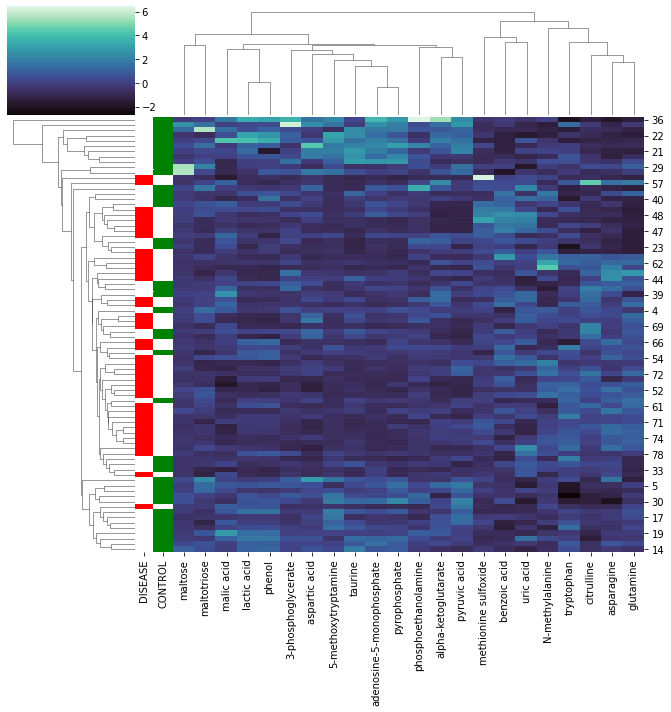

In [16]:
# Data set
import seaborn as sns
final_df1 = plasma.copy()
Class = plasma.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(plasma[imp0], cmap='mako', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('exploratory_plots/clustermap_exploratory_plasma.JPG')
plt.show()

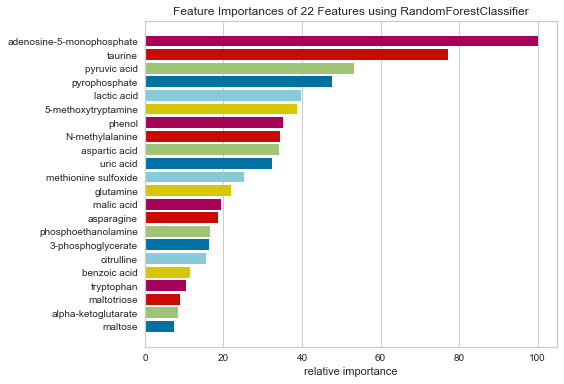

<AxesSubplot:title={'center':'Feature Importances of 22 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = final_df1[imp0]
y = final_df1['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

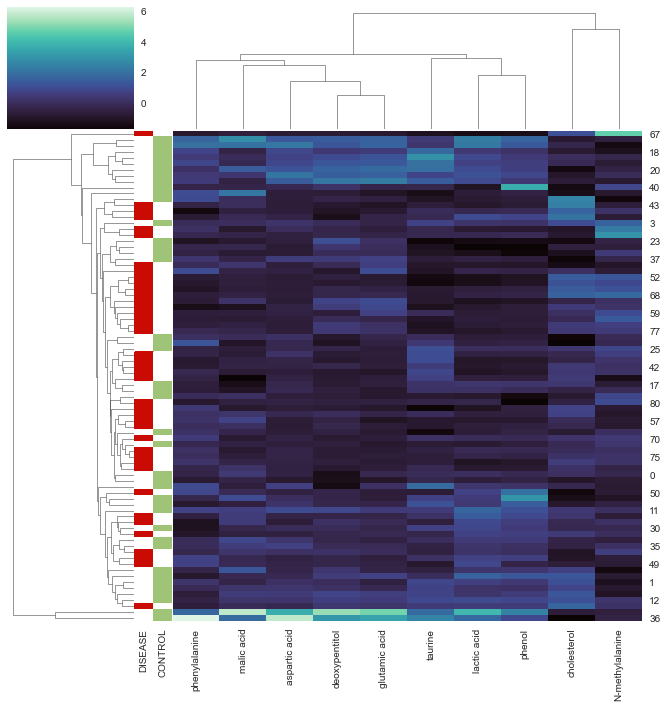

In [19]:
# Data set
import seaborn as sns
final_df1 = serum.copy()
Class = y
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(serum[imp1], cmap='mako', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('exploratory_plots/clustermap_exploratory_serum.JPG')
plt.show()

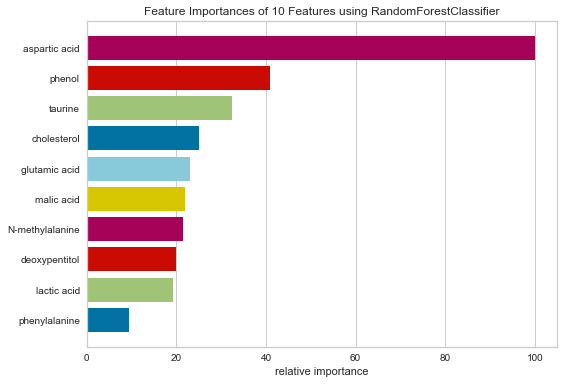

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = final_df1[imp1]
# y = final_df1['Class'].copy()
y = Class
model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()